# Walter's Working Notebook

In this notebook we are testing to find a correlation between director and mean_net_profit
This code was worked on by Walter Friedrich and Aidan Ryan 

Imports and SQL data connection 

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from scipy.stats import ttest_ind
from scipy import stats 
from scipy.stats import f_oneway
import seaborn as sns
import math

conn = sqlite3.connect('..\..\data\im.db')

Aggregated SQL query 
- Top 10 directors with highest mean_net_profit with num_movies greater than 5 
- Ordered by highest mean_net_profit descending 

In [3]:
director_AGG = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
director_AGG

,director,mean_net_profit,num_movies
0,Tim Burton,1.908611e+08,6
1,Ridley Scott,1.769673e+08,7
2,Steven Spielberg,1.647550e+08,8
3,Jon M. Chu,1.502429e+08,6
4,Clint Eastwood,1.379160e+08,6
5,Jaume Collet-Serra,7.547862e+07,6
6,Denis Villeneuve,5.732786e+07,6
7,Tim Story,4.845786e+07,9
8,Steven Soderbergh,4.558173e+07,7
9,David Gordon Green,4.236483e+07,8


We're using matplotlib to create a bar graph and visualize our sample population data for better insights

<Figure size 1000x600 with 0 Axes>

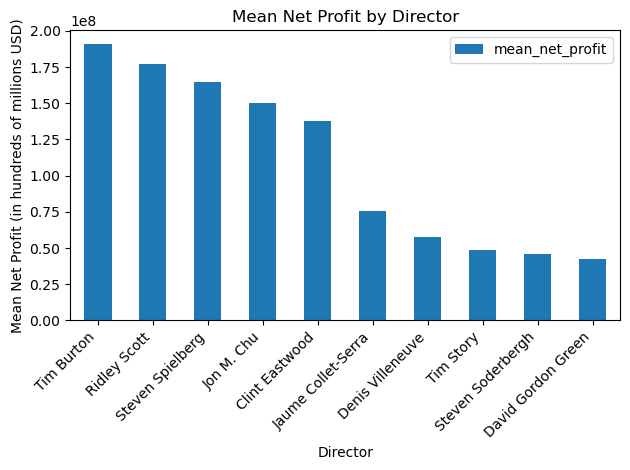

In [4]:
plt.figure(figsize=(10, 6))
director_AGG.plot.bar(x='director', y='mean_net_profit')
plt.title('Mean Net Profit by Director')
plt.xlabel('Director')
plt.ylabel('Mean Net Profit (in hundreds of millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Disaggregated SQL query 
2 categories 
   - Director 
   - net_profit 

In [7]:
director = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
ORDER BY mean_net_profit DESC
;
""", conn)
director

,director,mean_net_profit
0,Atsushi Wada,2.351345e+09
1,Ravi Punj,2.008208e+09
2,Jennifer Lee,1.122470e+09
3,Chris Buck,1.122470e+09
4,Chi-kin Kwok,1.122470e+09
...,...,...
2982,Daniel Beard,-7.944858e+07
2983,Candy J. Beard,-7.944858e+07
2984,Bambang Drias,-7.944858e+07
2985,Simon Wells,-1.104502e+08


Our goal is to gain a deeper understanding of the statistics underlying our sample population, with a particular focus on identifying any significant differences between two groups, namely the directors and mean net profits. We aim to test our hypothesis that directors make a significantly higher net profit than the population mean, while rejecting the null hypothesis that they do not.

Formula: (sample_mu - pop_mu) / (std/sqrt(n))

Hypothesis: (Director) makes significantly more net profit than our population mean.

Null Hypothesis: (Director) does not make significantly more net profit than our population mean. 

The formula for the t-test is as follows:
$$  test\_ statistic = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} $$

In [8]:
sample_mean = director_AGG['mean_net_profit'].mean()
sample_variance = ((director_AGG['mean_net_profit'] - sample_mean)**2).sum()/(len(director_AGG)-1)
sample_std = math.sqrt(sample_variance)
population_mean = director['mean_net_profit'].mean()

t_test = (sample_mean - population_mean) / (sample_std/math.sqrt(10))

print("Sample mean of net profit:", sample_mean)
print("Sample standard deviation of mean net profit:", sample_std)
print("population mean of mean net profit:", population_mean)
print("t-test statistic:", t_test)

Sample mean of net profit: 108995329.64623013
Sample standard deviation of mean net profit: 60449890.53309928
population mean of mean net profit: 50644282.99169029
t-test statistic: 3.0524821410893908


The t-test statistic of 2.2198435887264623 suggests that there is a statistically significant difference between the sample mean and the population mean. This means that it is unlikely that the difference between the sample mean and the population mean is due to chance. The exact interpretation of this result would depend on the specific research question and hypothesis being tested.

Sample mean of mean net profit: 108995329.64623013

Sample standard deviation of mean net profit: 60449890.53309928

population mean of mean net profit: 66560946.470664255

t-test statistic: 2.2198435887264623

The Seaborn graph that we created is a bar plot of the t-test statistic for a sample of mean net profit data.

The purpose of the t-test is to determine whether the mean net profit of a group of directors is significantly different from the population mean. The t-test statistic represents the difference between the sample mean and the population mean, standardized by the sample standard deviation and the sample size.

The bar plot visualizes the value of the t-test statistic. If the t-test statistic is greater than zero, it indicates that the sample mean is greater than the population mean. Conversely, if the t-test statistic is less than zero, it indicates that the sample mean is less than the population mean.

<Figure size 1000x600 with 0 Axes>

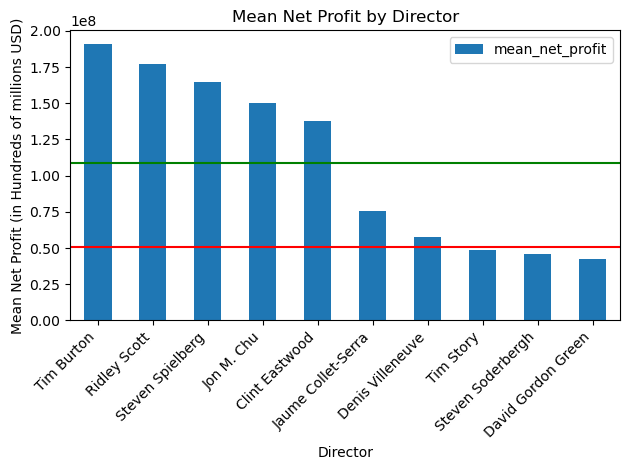

In [9]:
plt.figure(figsize=(10, 6))
director_AGG.plot.bar(x='director', y='mean_net_profit')
plt.axhline(y =50644282.99169031, color = 'r', linestyle = '-')
plt.axhline(y =108995329.64623015, color = 'g', linestyle = '-')
plt.title('Mean Net Profit by Director')
plt.xlabel('Director')
plt.ylabel('Mean Net Profit (in Hundreds of millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()